/home/flow3d-docker/out/SS316L_small_10_micron/0_0400_02.0_1.0E-4_1.0E-5/generate_melt_pool_dimensions.ipynb

In [1]:
import pandas as pd

# Define the key for the DataFrame you want to load
key = "temperature"  # Replace with the actual key (e.g., "pressure", "fraction_of_fluid")

# Define the path to the pickled file
file_path = f"measurements/melt_pool/{key}.csv"

# Load the DataFrame
try:
    dimensions_df = pd.read_csv(file_path)
    print("DataFrame loaded successfully!")
    print(dimensions_df.head())  # Display the first few rows
except FileNotFoundError:
    print(f"File not found: {file_path}")


File not found: measurements/melt_pool/temperature.csv


<Figure size 640x480 with 0 Axes>

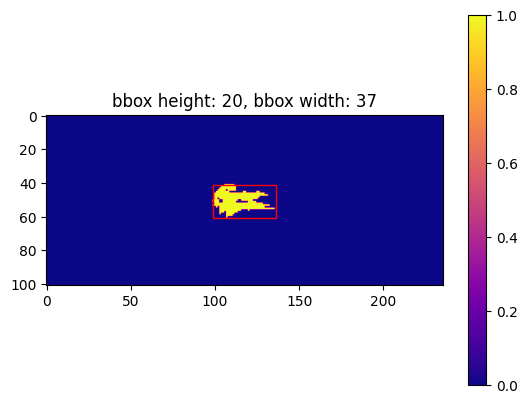

<Figure size 640x480 with 0 Axes>

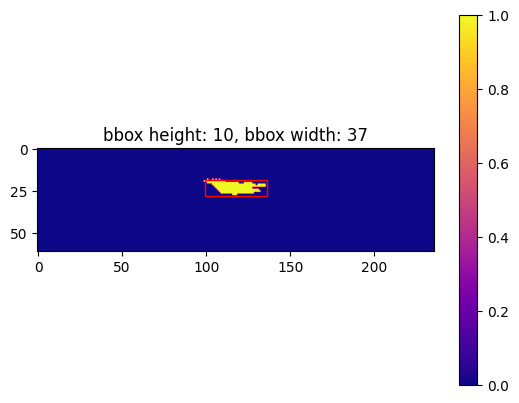

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

index = 100
index_string = f"{index}".zfill(8)

data = np.load(f"measurements/melt_pool/{key}/{index_string}.npz")
for plane in ["xy", "xz"]:
    min_row, min_col, max_row, max_col = data[f"bbox_{plane}"]

    bbox_width = max_col - min_col
    bbox_height = max_row - min_row

    # Create the bounding box
    rect = patches.Rectangle(
        (min_col, min_row),  # Bottom-left corner of the rectangle
        bbox_width,               # Width of the rectangle
        bbox_height,              # Height of the rectangle
        linewidth=1,         # Thickness of the rectangle edge
        edgecolor='red',     # Color of the rectangle edge
        facecolor='none'     # No fill color
    )

    # Plot the labeled max region with the bounding box
    plt.figure()
    fig, ax = plt.subplots()

    labels_max_blob = data[f"labels_max_blob_{plane}"]
    ax.imshow(labels_max_blob, cmap="plasma")
    ax.add_patch(rect)  # Add the rectangle to the plot

    # Add a colorbar and show the plot
    plt.title(f"bbox height: {bbox_height}, bbox width: {bbox_width}")
    plt.colorbar(ax.imshow(labels_max_blob, cmap="plasma"))
    plt.show()